<div style='background-color:orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Table of Contents
    </h1></i></u></b>
    <li><a href='#imports'>Imports</a>
    <li><a href='#wrangle'>Wrangle</a>
    <li><a href='#explore'>Exploration</a>
    <li><a href='#model'>Modeling</a>
    <li><a href='#conclusion'>Conclusion</a>
    </li>
</div>

<div style='background-color:orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Imports
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [1]:
# Import 'final.py' to expedite and maintain cleanliness
# of this file...
import final as f

<div style='background-color:orange'>
<a id='wrangle'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Wrangle
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

<h3><b>Acquire</b></h3>

Obtain Texas vehicle crashes that had a motorcycle involved between 2018 and 2022 dataset from <a href='https://cris.dot.state.tx.us/public/Query/app/query-builder'>CRIS Query</a>

In [2]:
# From the 'final.py' file...
# Acquire the raw version of the data
raw_data = f.acquire()
raw_data.shape

(81153, 233)

- Vanilla 'raw_data' shape
    - Rows: 81,153
    - Columns: 233

---

<h3><b>Prepare</b></h3>

- Changed whitespace to '_' and lowercased columns
- Change all nulls to 'no data'
- Identified only single vehicle crashes (SVCs // Motorcycle only)
    - 81153 Rows ==> 14548 Rows
- Removed columns
    - 234 Columns ==> 131 Columns
- Adjusted target column
    - Added possible injury as minor injury
    - Removed unknown values
    - 14548 Rows ==> 14174 Rows
- Datetime column created
    - 'crash_datetime' == 2022-12-31 12:26:00
    - 131 Columns ==> 132 Columns

In [3]:
# From the 'final.py' file...
# Get the prepared dataframe of the
# Single Vehicle Crash (SVC // Motorcycle) dataset
prep_data = f.prepare()
prep_data.shape

(14174, 132)

- Prepared 'prep_data' shape:
    - Rows: 14,174
    - Columns: 132

---

<h3><b>Split</b></h3>

- Train
    - 70%
- Validate
    - 20%
- Test
    - 10%

<div style='background-color:orange'>
<a id='explore'></a>
    <b><u><i><h1 style='text-align:center'>
        Exploration
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#visuals'>Key Visuals</a>
    <li><a href='#exploresummary'>Summary</a>
    </li>
</div>

<a id='visuals'></a>
<h3><b>Key Visuals</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

<b>Question 1:</b> Does time of day matter?

<b>H$_0$:</b> The time of day does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The time of day does make a significant difference in the injury severity of single motorcycle crashes in Texas.

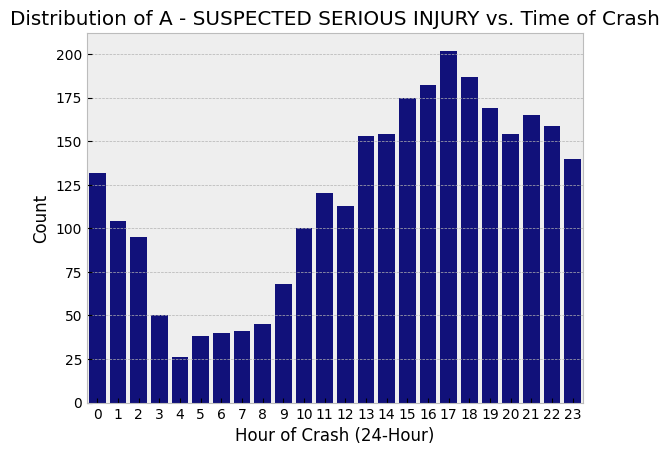

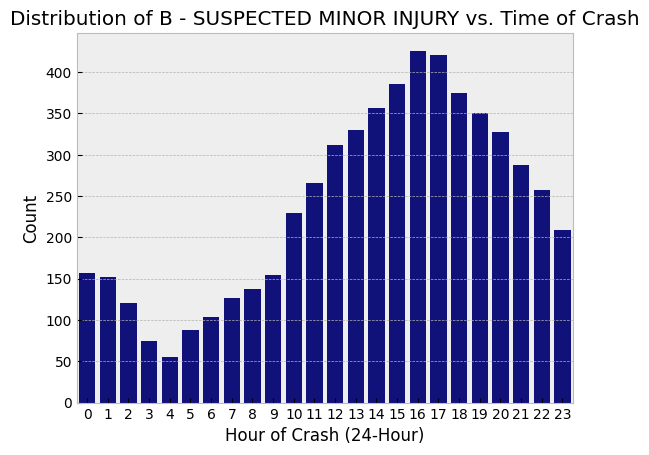

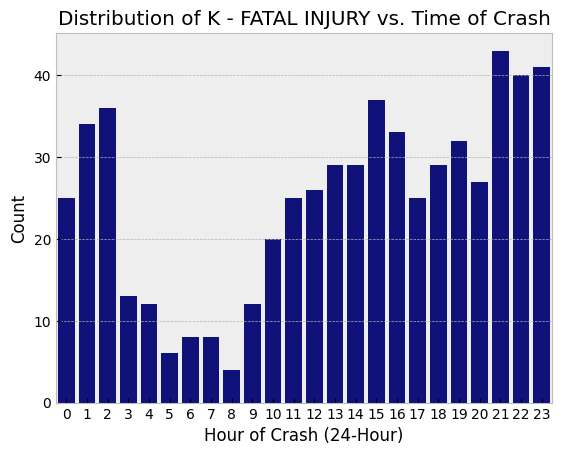

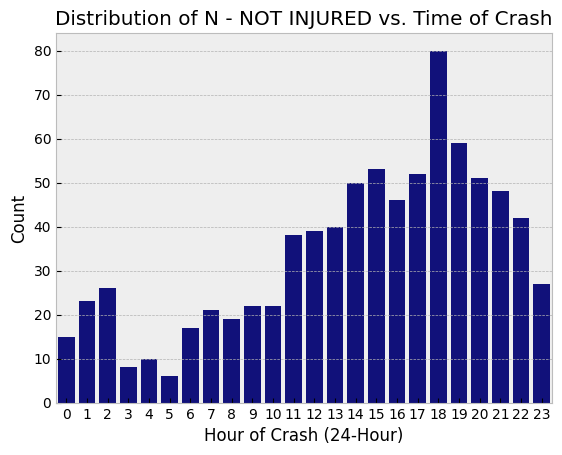

In [4]:
# From the 'final.py' file...
# Get the barplots of Injury Severity vs. Hour of Crash
f.visual1()

In [5]:
# From the 'final.py' file...
# Get the chi2_contingency of Injury Severity vs. Hour of Crash
f.stat1()

========== REJECT NULL HYPOTHESIS ==========
A - SUSPECTED SERIOUS INJURY
Statistic: 67.07128108084572
P-Value: 3.41527745031303e-06

========== REJECT NULL HYPOTHESIS ==========
B - SUSPECTED MINOR INJURY
Statistic: 108.3855872120522
P-Value: 4.858498515988938e-13

========== REJECT NULL HYPOTHESIS ==========
K - FATAL INJURY
Statistic: 90.95108384467727
P-Value: 4.919390955040343e-10

========== REJECT NULL HYPOTHESIS ==========
N - NOT INJURED
Statistic: 36.41876853325397
P-Value: 0.037366690386665076



<b><i>
    REJECT NULL HYPOTHESIS!
</i></b>

The time of day does make a significant difference in the injury severity of single motorcycle crashes in Texas.

---

<b>Question 2:</b> Does day of week matter?

<b>H$_0$:</b> The day of week does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The day of week does make a significant difference in the injury severity of single motorcycle crashes in Texas.

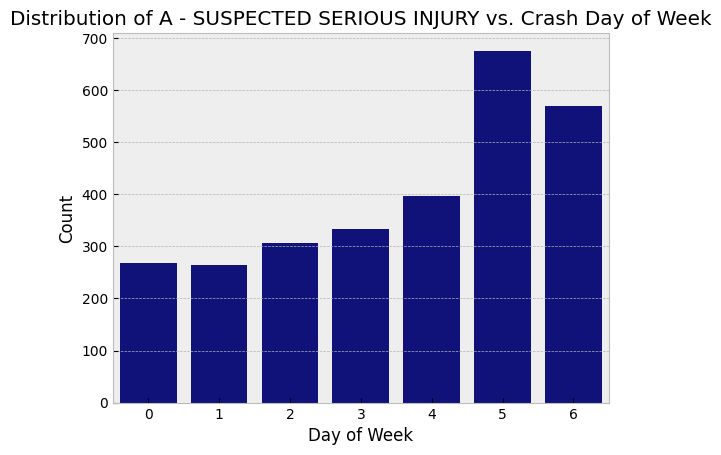

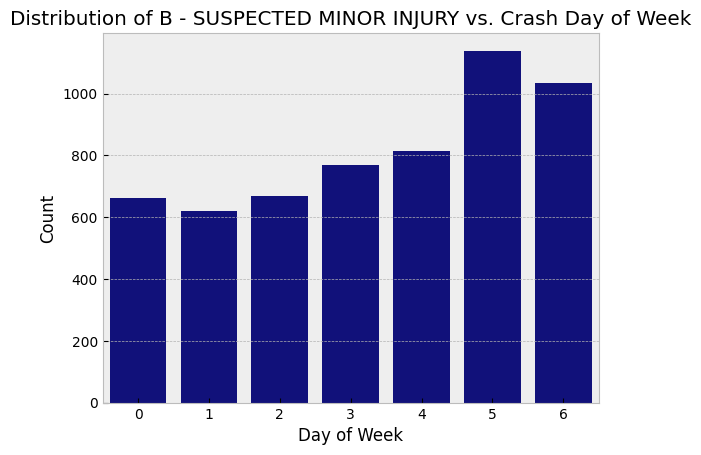

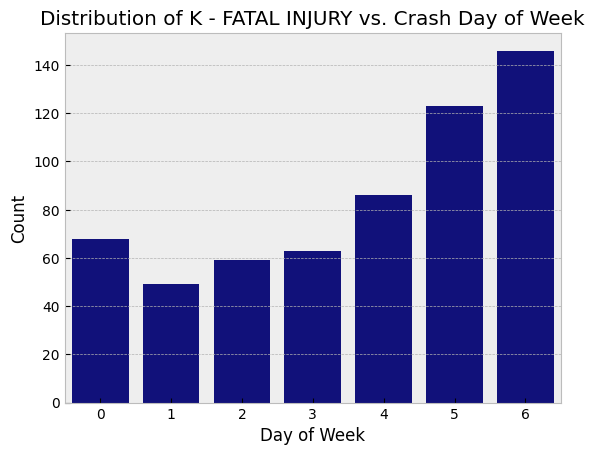

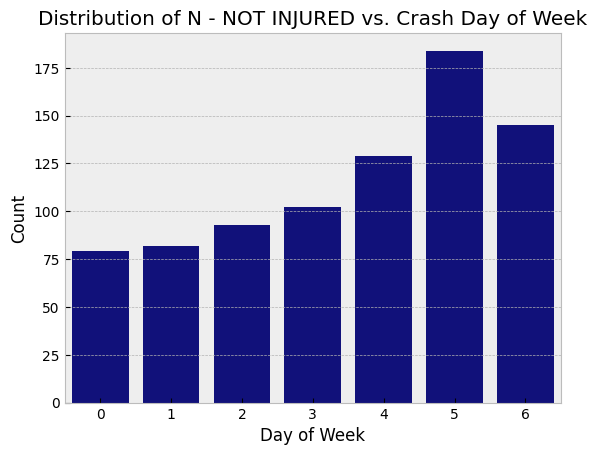

In [6]:
# From the 'final.py' file...
# Get the barplots of Injury Severity vs. Day of Week
f.visual2()

In [7]:
# From the 'final.py' file...
# Get the chi2_contingency of Injury Severity vs. Day of Week
f.stat2()

========== REJECT NULL HYPOTHESIS ==========
Condition: 4
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 28.210643594395666
P-Value: 8.57562461036832e-05

========== REJECT NULL HYPOTHESIS ==========
Condition: 6
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 28.210643594395666
P-Value: 8.57562461036832e-05

========== REJECT NULL HYPOTHESIS ==========
Condition: 5
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 28.210643594395666
P-Value: 8.57562461036832e-05

========== REJECT NULL HYPOTHESIS ==========
Condition: 3
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 28.210643594395666
P-Value: 8.57562461036832e-05

========== REJECT NULL HYPOTHESIS ==========
Condition: 2
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 28.210643594395666
P-Value: 8.57562461036832e-05

========== REJECT NULL HYPOTHESIS ==========
Condition: 1
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 28.210643594395666
P-Value: 8.57562461036832e-05

========== REJECT NULL HYPOTHESIS ==========
Condition: 0
Injury

<b><i>
    REJECT NULL HYPOTHESIS FOR MAJORITY!
</i></b>

The day of week does make a significant difference in the injury severity of single motorcycle crashes in Texas.

(Only accept for not injured)

---

<b>Question 3:</b> Does weather matter?

<b>H$_0$:</b> The weather does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The weather does make a significant difference in the injury severity of single motorcycle crashes in Texas.

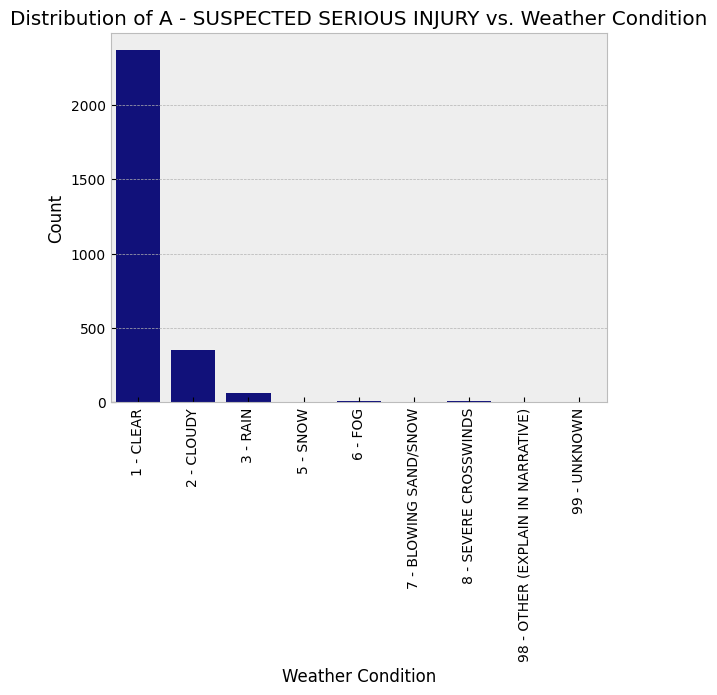

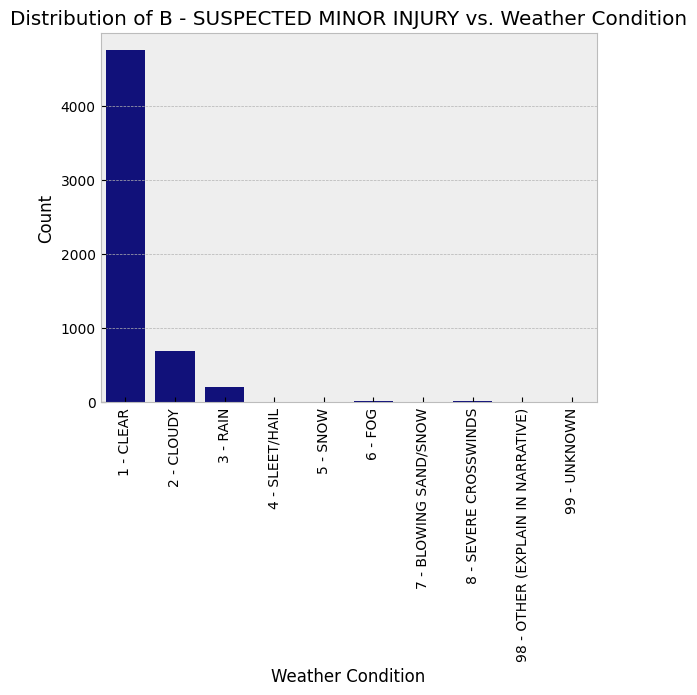

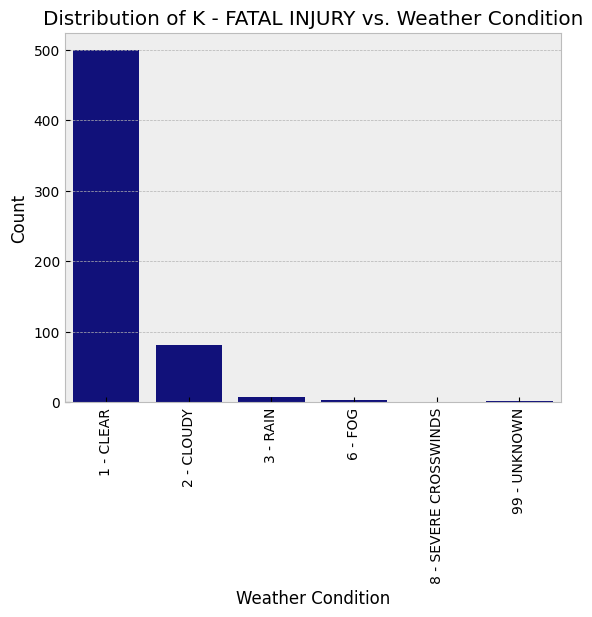

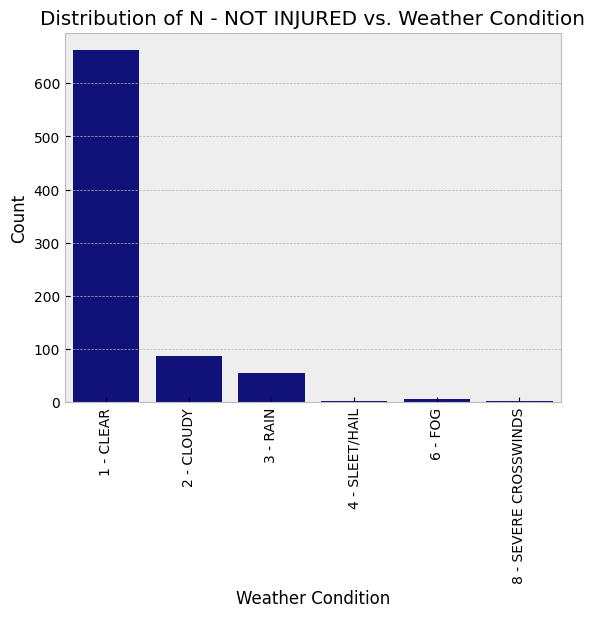

In [8]:
# From the 'final.py' file...
# Get the barplots of Injury Severity vs. Weather Condition
f.visual3()

In [9]:
# From the 'final.py' file...
# Get the chi2_contingency of Injury Severity vs. Weather Condition
f.stat3()

========== ACCEPT NULL HYPOTHESIS ==========
Condition: 1 - CLEAR
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 1.3260471229444004
P-Value: 0.2495096579774857

========== ACCEPT NULL HYPOTHESIS ==========
Condition: 2 - CLOUDY
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 0.41790151208219195
P-Value: 0.5179860104884394

========== REJECT NULL HYPOTHESIS ==========
Condition: 3 - RAIN
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 14.303891698639651
P-Value: 0.00015554297666960987

========== ACCEPT NULL HYPOTHESIS ==========
Condition: 8 - SEVERE CROSSWINDS
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 0.8874740994165442
P-Value: 0.346162722079041

========== ACCEPT NULL HYPOTHESIS ==========
Condition: 6 - FOG
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 0.41583896698341405
P-Value: 0.51902065532515

========== ACCEPT NULL HYPOTHESIS ==========
Condition: 7 - BLOWING SAND/SNOW
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS

<b><i>
    ACCEPT NULL HYPOTHESIS FOR MAJORITY!
</i></b>

The weather does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

(Rain passed all levels of injury except minor and unknown levels of injury)

---

<b>Question 4:</b> Do intersections matter?

<b>H$_0$:</b> Intersections do not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> Intersections do make a significant difference in the injury severity of single motorcycle crashes in Texas.

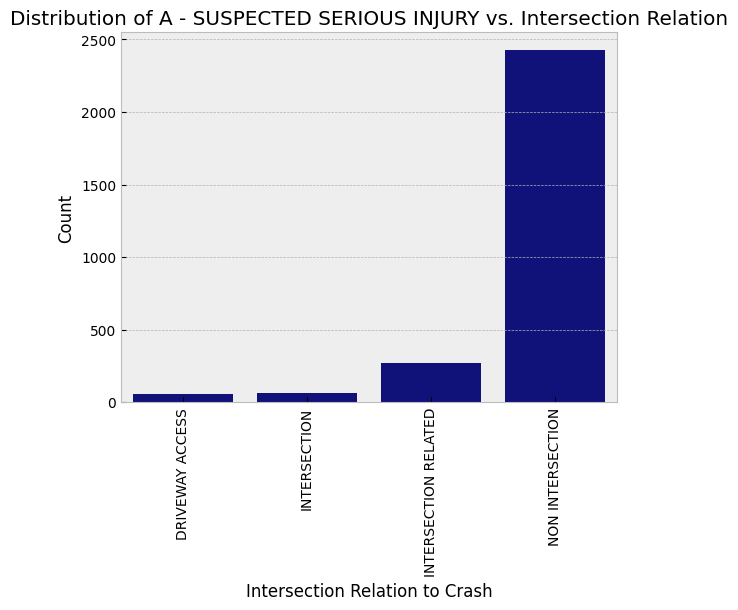

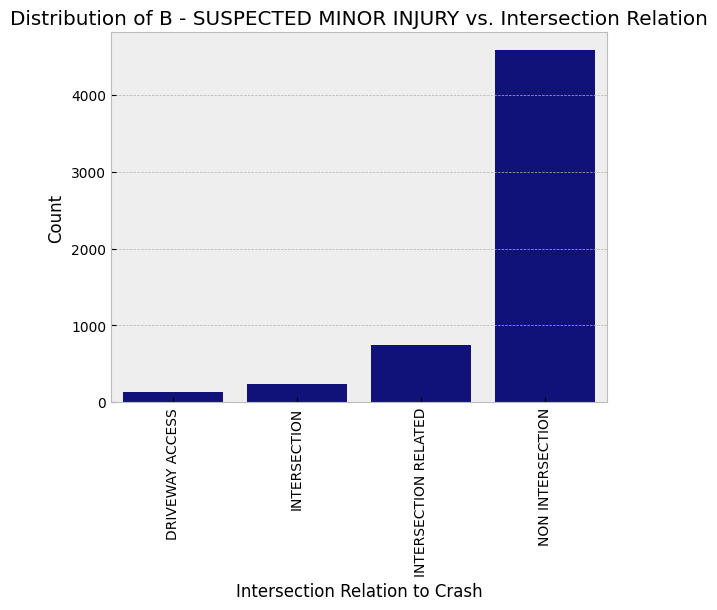

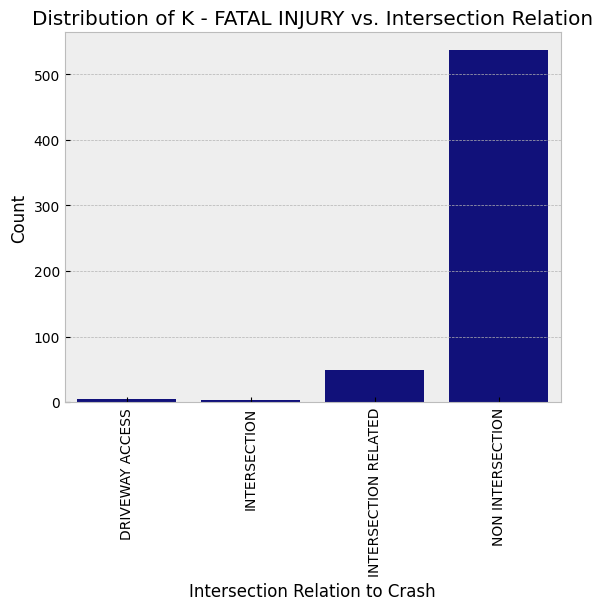

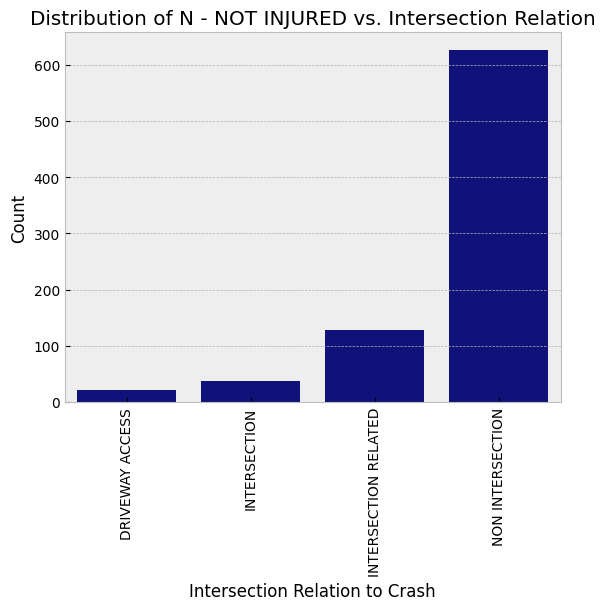

In [10]:
# From the 'final.py' file...
# Get the barplots of Injury Severity vs. Intersection Relation
f.visual4()

In [11]:
# From the 'final.py' file...
# Get the chi2_contingency of Injury Severity vs. Intersection Relation
f.stat4()

========== REJECT NULL HYPOTHESIS ==========
Condition: NON INTERSECTION
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 41.422268651466624
P-Value: 1.2265219978246446e-10

========== REJECT NULL HYPOTHESIS ==========
Condition: INTERSECTION RELATED
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 23.027602750462403
P-Value: 1.5969205473578827e-06

========== REJECT NULL HYPOTHESIS ==========
Condition: INTERSECTION
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 16.174791129661276
P-Value: 5.775765297170404e-05

========== ACCEPT NULL HYPOTHESIS ==========
Condition: DRIVEWAY ACCESS
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 0.8859799362417826
P-Value: 0.3465690370923442

========== REJECT NULL HYPOTHESIS ==========
Condition: NON INTERSECTION
Injury: B - SUSPECTED MINOR INJURY
Statistic: 36.40964401519803
P-Value: 1.5991001980906656e-09

========== REJECT NULL HYPOTHESIS ==========
Condition: INTERSECTION RELATED
Injury: B - SUSPECTED MINOR INJURY
Statistic: 14.795498547787574
P-

<b><i>
    REJECT NULL HYPOTHESIS!
</i></b>

Intersections do make a significant difference in the injury severity of single motorcycle crashes in Texas.

(Intersections & Driveway Access for not injured isn't statistically significant)

---

<a id='exploresummary'></a>
<h3><b>Summary</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

It would appear that the time of day, day of week, rainy weather conditions, and relation to intersections impact the injury severity of a motorcyclist in a crash.

<div style='background-color:orange'>
<a id='model'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Modeling
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#baseline'>Baseline</a>
    <li><a href='#modeltable'>Models Table</a>
    <li><a href='#bestmodel'>Best Model</a>
    </li>
</div>

<a id='baseline'></a>
<h3><b>Baseline</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [12]:
# From the 'final.py' file...
# Obtain the baseline score of {FEATURE} via {METHOD}


---

<a id='modeltable'></a>
<h3><b>Models Table</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [13]:
# From the 'final.py' file...
# Get the scores of the baseline and the 4 best unique models
f.models()

,Model,Best Estimator,Best Parameters,Train Accuracy
0,Decision Tree,"DecisionTreeClassifier(max_depth=3, random_sta...","{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.611749
1,Random Forest,"RandomForestClassifier(max_depth=3, random_sta...","{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.612353
2,KNN,"KNeighborsClassifier(algorithm='ball_tree', n_...","{'algorithm': 'ball_tree', 'n_neighbors': 50, ...",0.608826
3,Logistic Regression,"LogisticRegression(C=10, random_state=1776, so...","{'C': 10, 'random_state': 1776, 'solver': 'sag'}",0.603990
4,Baseline,Baseline(mode),{Baseline-Mode},0.575000


Accuracy:

Since we want to be able to accurately predict the level of injury of the motorcyclist regardless of how severe, we will go for the most accurate model.

---

<a id='bestmodel'></a>
<h3><b>Best Model</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [14]:
# From the 'final.py' file...
# Get the scores of the baseline and the best model


<div style='background-color:orange'>
<a id='conclusion'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Conclusion
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#conclusionsummary'>Summary</a>
    <li><a href='#rec'>Recommendations</a>
    <li><a href='#nextsteps'>Next-Steps</a>
    </li>
</div>

<a id='conclusionsummary'></a>
<h3><b>Summary</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

SUMMARY HERE

---

<a id='rec'></a>
<h3><b>Recommendations</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

RECOMMENDATIONS HERE

---

<a id='nextsteps'></a>
<h3><b>Next-Steps</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

NEXT-STEPS HERE